In [1]:
!pip install spotipy

In [1]:
#uvozimo potrebno biblioteke
import spotipy
import requests
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials 
import time
import numpy as np
import matplotlib.pyplot as plt


#potrebni id-evi za rad sa spotify podacima

client_id = "30096672ed734215a710b0c8ae36726d"
client_secret = "0544c2212476415888c498789f6e80b0"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [2]:
#biramo željene izvođače i stavljamo njihove albume i uri-je u dvije liste
name = ["Natali Dizdar","Filip Dizdar"]

artist_album_names = []
artist_album_uris = []
for k in range(len(name)):
    result = sp.search(name[k]) 
    result['tracks']['items'][k]['artists']
    #Extract Artist's uri
    artists_uris = result['tracks']['items'][0]['artists'][0]['uri']
    #Pull all of the artist's albums
    artist_albums = sp.artist_albums(artists_uris, album_type='album')
    #Store artist's albums' names' and uris in separate lists
    for i in range(len(artist_albums['items'])):
        artist_album_names.append(artist_albums['items'][i]['name'])
        artist_album_uris.append(artist_albums['items'][i]['uri'])

artist_album_names
artist_album_uris

['spotify:album:2OGMw383aolTxxJSalsQcn',
 'spotify:album:5FngUASNGNQ5aaymJxQCe8',
 'spotify:album:5QIRBnHU5R3qLumWE0Weqw',
 'spotify:album:3YVcRmrLD8nUbAJRE6r4Pp',
 'spotify:album:5gqNJ6yBOLKEmrfkDiLA1F',
 'spotify:album:604L5cGCARnrYDFTzP9czQ',
 'spotify:album:6W9QMPkwucSMOOkq2flxz0',
 'spotify:album:77yxlVL5dkorwBfEmIb5sH']

In [3]:
#trazi se po albumu i cuvaju se podaci i adrese o pjesmama
def album_songs(uri,market):
    album = uri 
    spotify_albums[album] = {}
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] 
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    #pull data on album tracks
    tracks = sp.album_tracks(album) 
    if(market == 'BA'):
        for n in range(len(tracks['items'])): 
            spotify_albums[album]['album'].append(artist_album_names[album_count]) 
            spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
            spotify_albums[album]['id'].append(tracks['items'][n]['id'])
            spotify_albums[album]['name'].append(tracks['items'][n]['name'])
            spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])
           

market = "BA"
        
spotify_albums = {}
album_count = 0
for i in artist_album_uris: #po svakom albumu
    album_songs(i,market)
    album_count+=1 #Nakon sto su dodatne sve pjesme sa jednog albuma povecava se broj albuma za 1
    
        

In [4]:
#audio osobine pjesama
def audio_features(album):
    #dodaju se kljucne rijeci po kojima ce se spremati podaci
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    
    
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #povlacenje podataka o audio feature-ima po svakoj pjesmi
        features = sp.audio_features(track)
        
        #dodajemo podatke po relevantnim kljucnim rijecima
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [5]:

#ovdje dodajemo namjerno kasnjenje tako da bi nam spotify api mogao lijepo vratiti podatke, a da ga ne zatrpavamo prevelikom kolicinom podataka

sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        
        
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

dataframe = pd.DataFrame.from_dict(dic_df)
dataframe

print(len(dataframe))
final_df = dataframe.sort_values('popularity', ascending=True).drop_duplicates('name').sort_index()
print(len(final_df))

final_df.head(300)

final_df.to_csv("spotify_music.csv")


5 playlists completed
94
65


Locator attempting to generate 1103 ticks ([-1.02, ..., 21.02]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1103 ticks ([-1.02, ..., 21.02]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1103 ticks ([-1.02, ..., 21.02]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1103 ticks ([-1.02, ..., 21.02]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1103 ticks ([-1.02, ..., 21.02]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1103 ticks ([-1.02, ..., 21.02]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1103 ticks ([-1.02, ..., 21.02]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1103 ticks ([-1.02, ..., 21.02]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1103 ticks ([-1.02, ..., 21.02]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1103 ticks ([-1.02, ..., 21.02]),

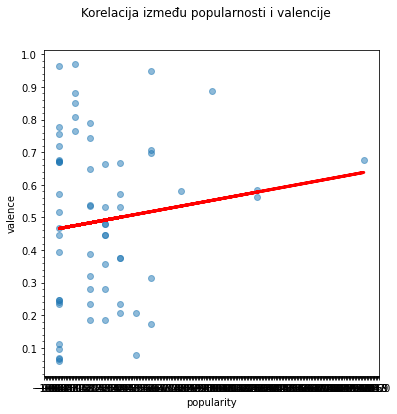

In [6]:
#ANALIZA PODATAKA

#koristi se sklearn

import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#linearna regresija

%matplotlib inline

#provjera nan podataka
#final_df je ono s cim cemo dalje nastaviti raditi
final_df.isnull()
final_df = final_df.fillna(0)

#korelacija izmedju popularnosti i audio osobina

x = final_df["popularity"].values
y = final_df["valence"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Korelacija između popularnosti i valencije")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))


plt.xlabel("popularity")
plt.ylabel("valence")

plt.show()

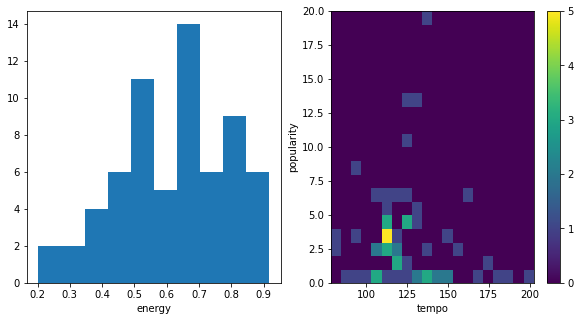

In [7]:
#kreirat cemo histograme
#prvi histogram pokazuje pjesme po nivou energije
#drugi histogram pokazuje broj pronađenih pjesama u odnosu na cjelokupne vrijednosti za tempo i popularnost

x = "tempo"
y = "popularity"

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
h = ax2.hist2d(final_df[x], final_df[y], bins=20)
ax1.hist(final_df["energy"])

ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("energy")

plt.colorbar(h[3], ax=ax2)

plt.show()

In [8]:
#kreirat ćemo niz odabranih audio osobina i posmatrati sličnosti među pjesmama

odabrane = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability",
            "instrumentalness"]
text1 = final_df["name"]
text2 = text1.values

X = final_df[odabrane].values
y = final_df["danceability"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3) # PCA - Principal Component Analysis (alat za smanjenje dimenzija)
# PCA se koristi za izdvajanje informacija iz viseg dimenzionalnog prostora i preslikava ih u nizi dimenzionalni prostor
pca.fit(X)

X = pca.transform(X)

In [9]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyzmq>=13 in c:\users\amra\anaconda3\lib\site-packages (from jupyter-client->ipykernel>=4.5.1->ipywidgets>=7.0.0->cufflinks) (19.0.2)



In [10]:
conda install -c https://conda.anaconda.org/plotly plotly

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [11]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")

<AxesSubplot:>

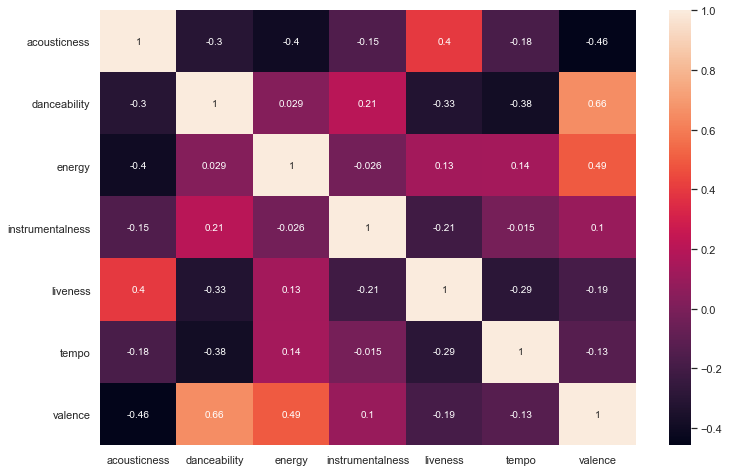

In [12]:
#eksplorativna analiza
#Između određenih osobina postoje veze

corr = final_df[['acousticness','danceability','energy',
'instrumentalness','liveness','tempo','valence']].corr()

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

%matplotlib inline

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)